In [1]:
import os
os.chdir("..")

In [2]:
from shell.datasets.datasets import MNIST, FashionMNIST, KMNIST, CIFAR100
from torchvision.utils import make_grid
import matplotlib.pyplot as plt
import torch
from shell.utils.utils import seed_everything

seed_everything(0)

In [3]:
num_train = -1
dataCls = [MNIST, FashionMNIST, KMNIST, CIFAR100]
datasets = [cls(num_train=num_train) for cls in dataCls]

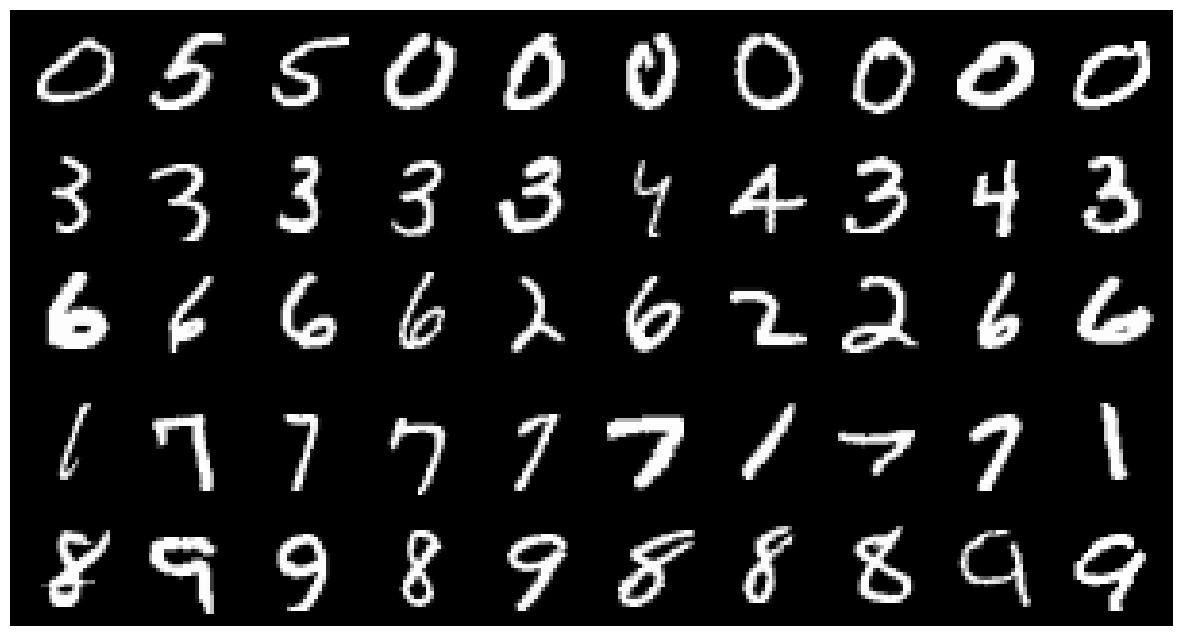

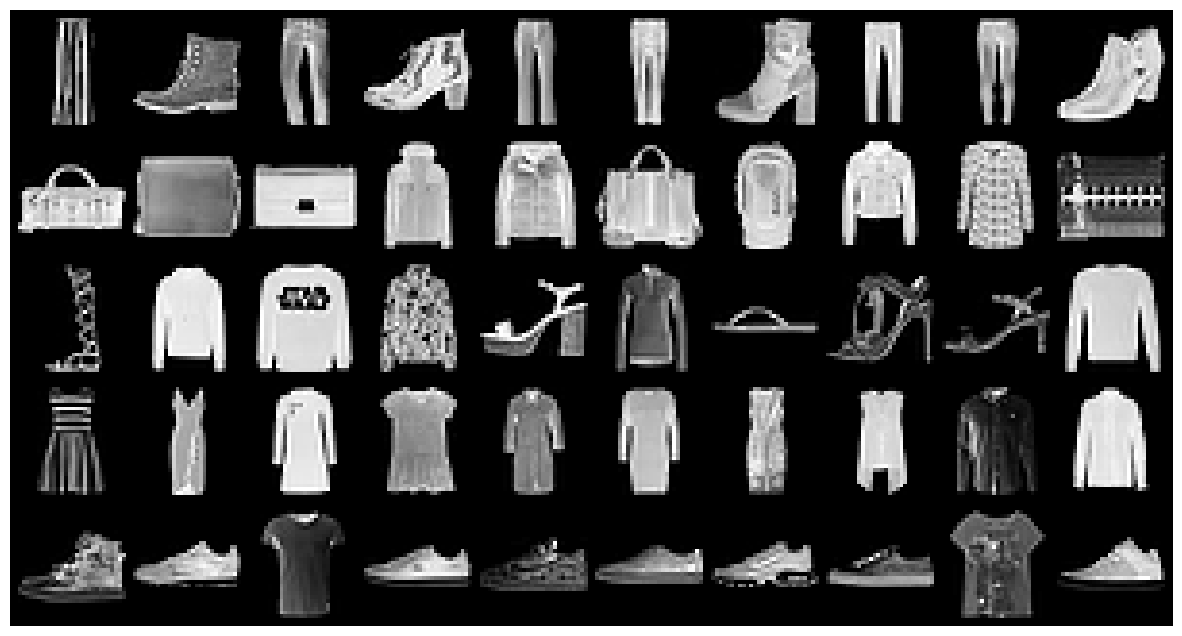

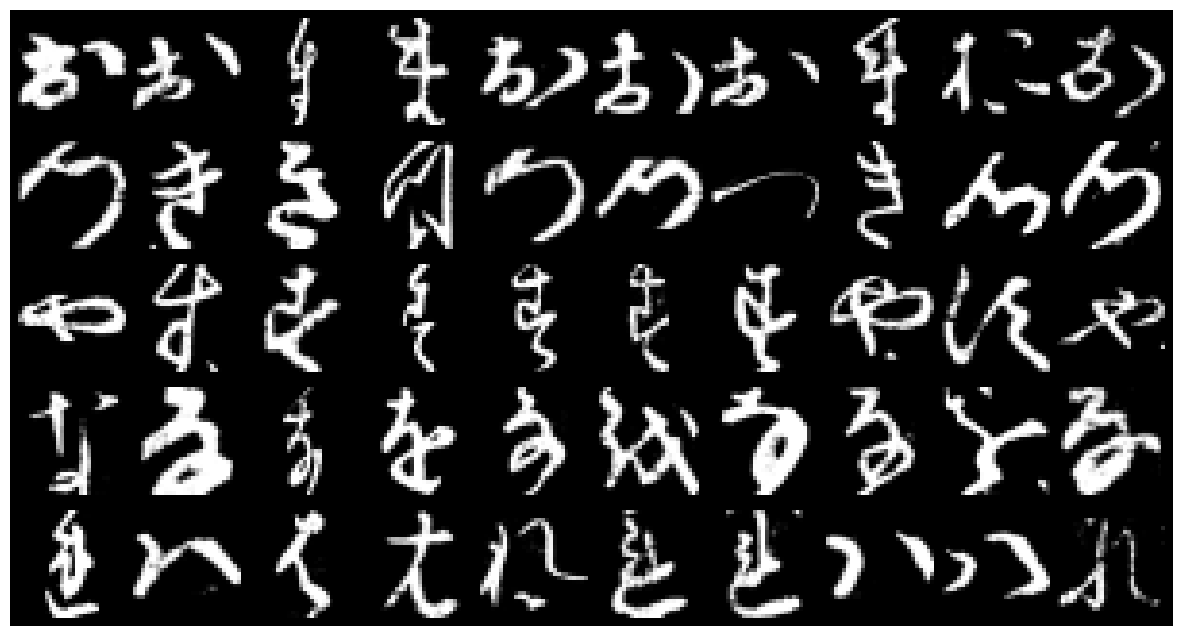

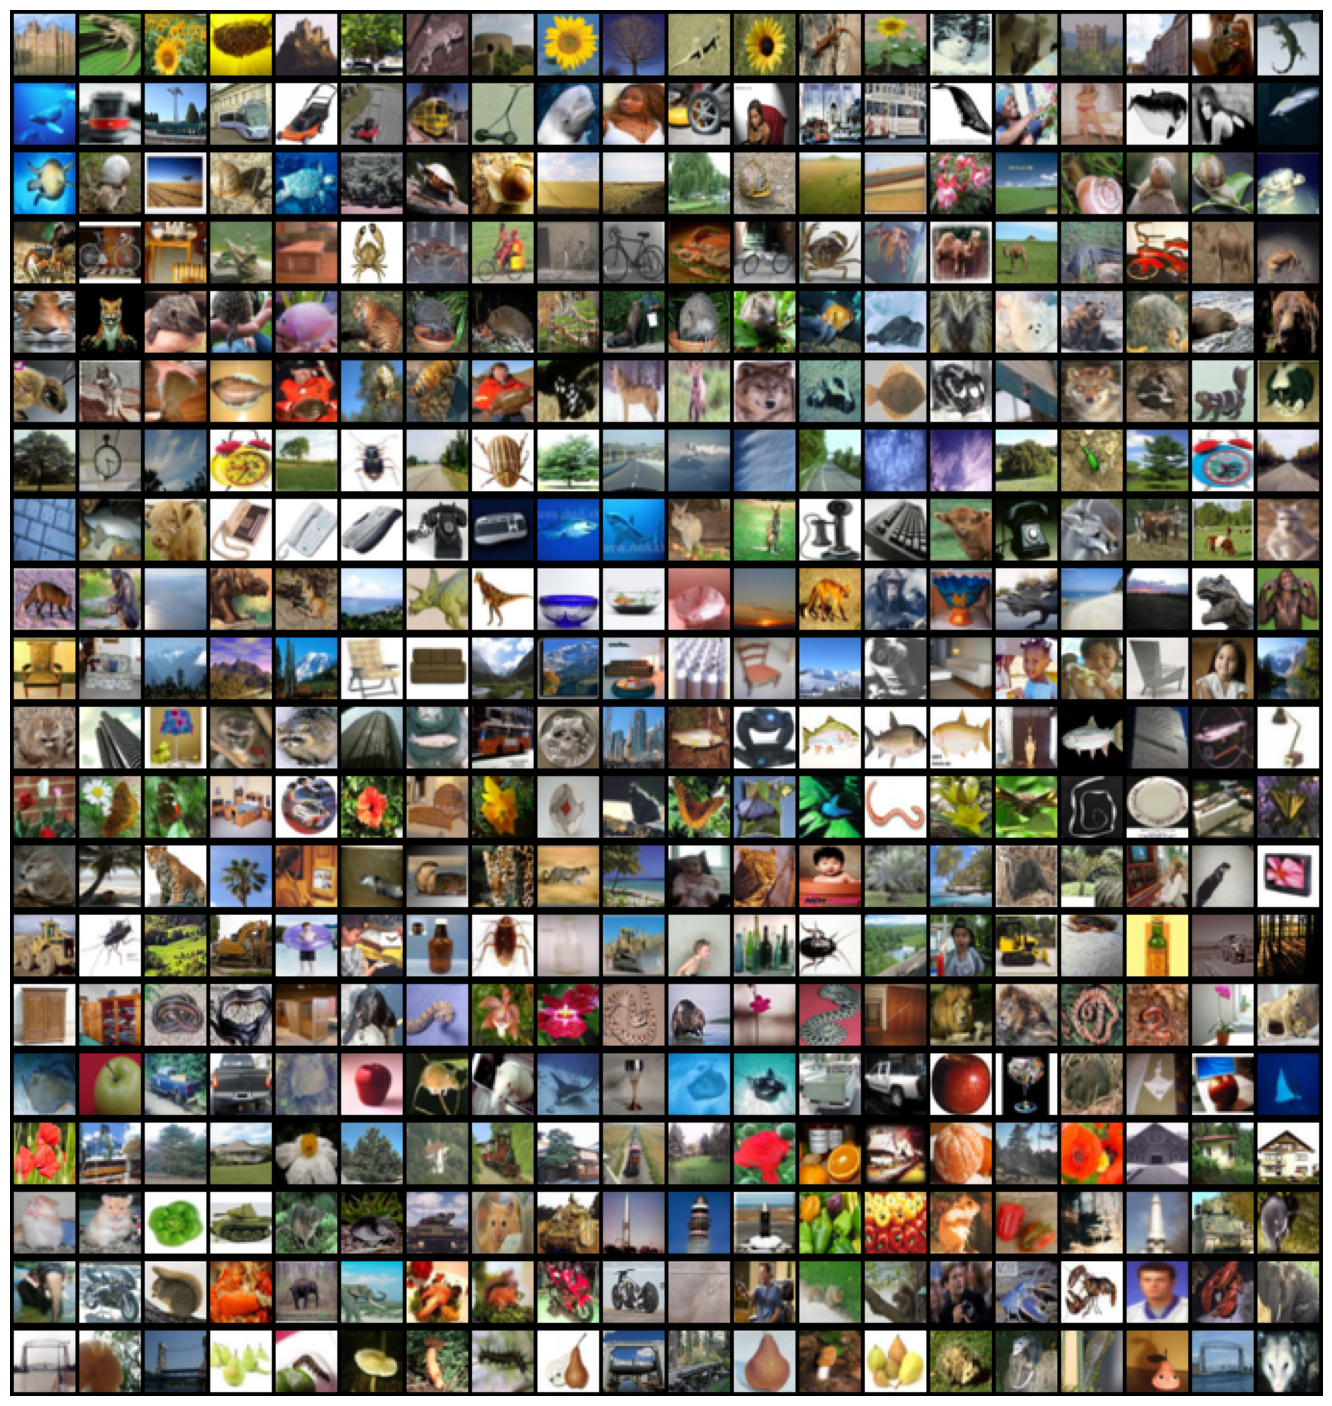

In [4]:
for dataset in datasets:
    num_tasks = len(dataset.trainset)
    n_images_per_task = 20 if dataset.name == "cifar100" else 10
    X_tasks = []
    for task in range(num_tasks):
        task_dataset = dataset.trainset[task]
        X = task_dataset.tensors[0]
        X = X[:n_images_per_task]
        X_task = make_grid(X, nrow=n_images_per_task)
        X_tasks.append(X_task)
    X = torch.cat(X_tasks, dim=1)

    plt.figure(figsize=(20, 18 if dataset.name == "cifar100" else 8))
    plt.imshow(X.permute(1, 2, 0))
    plt.axis("off")
    # save image at Figures/datasets/dataset.name
    plt.savefig(f"Figures/datasets/{dataset.name}.pdf", bbox_inches="tight")

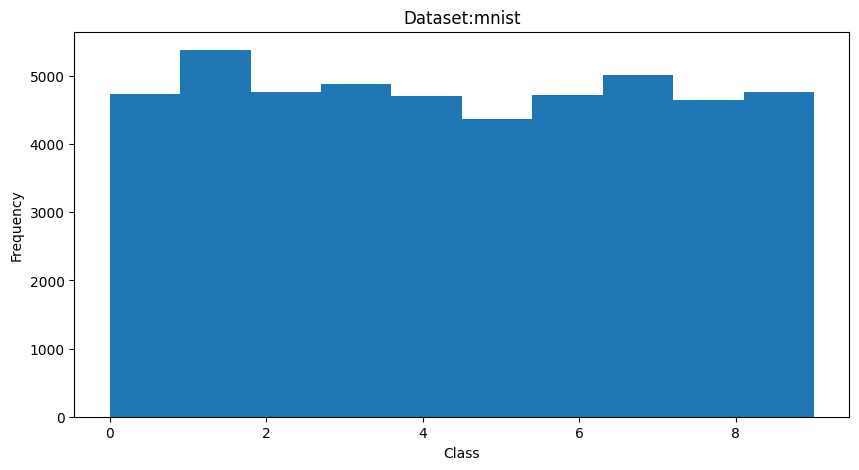

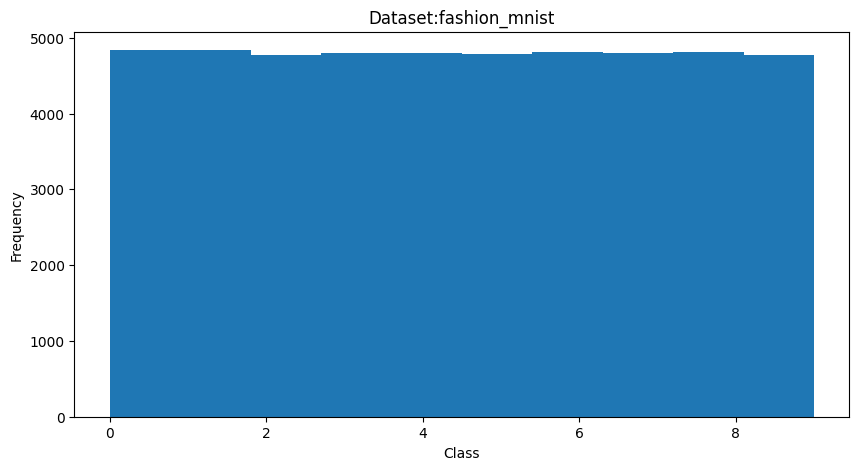

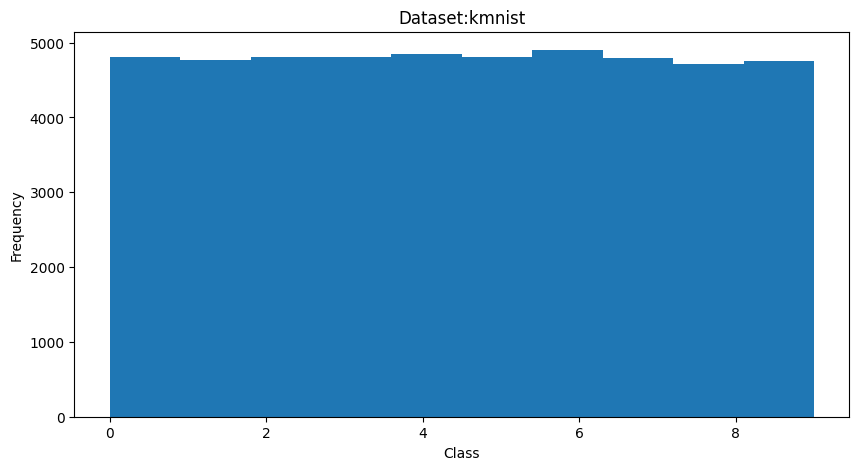

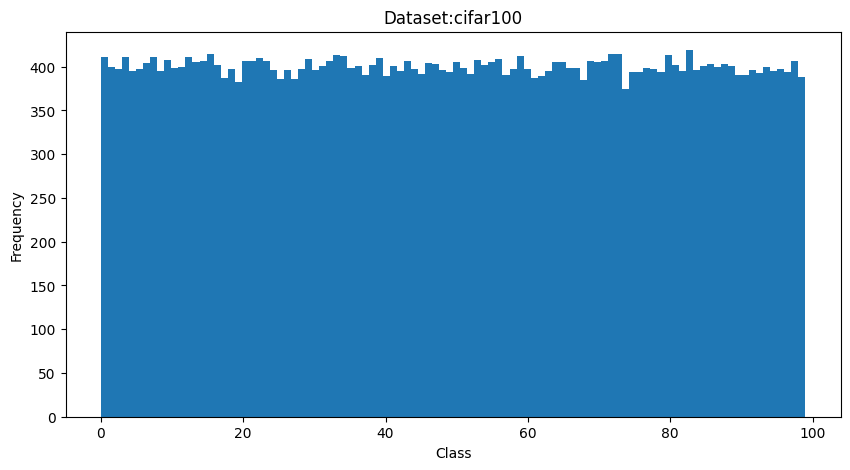

In [15]:
# plot the class distribution (assuming global labels i.e. no remapping labels, no sampling with replacement)
Y = []
for dataset in datasets:
    num_tasks = len(dataset.trainset)
    y = []
    for task in range(num_tasks):
        tensordataset = dataset.trainset[task]
        y.append(tensordataset.tensors[1])
    y = torch.cat(y)
    Y.append(y)
    plt.figure(figsize=(10, 5))
    plt.hist(y, bins=dataset.num_classes)
    plt.xlabel("Class")
    plt.ylabel("Frequency")
    plt.title(f"Dataset:{dataset.name}")
    # plt.xticks(range(dataset.num_classes))